In [39]:
# local에 padnas, numpy, matplotlib 설치필요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Amazon Data

**1-1. Used Data**

*   https://amazon-reviews-2023.github.io/






Item Based CF

In [16]:
def preprocess_review(review_path):
    try:
      review_df = pd.read_json(review_path)
      filtered_review_df = review_df[["asin", "rating", "user_id", "title", "category"]]
      distinct_review_df = filtered_review_df.drop_duplicates(subset=["user_id", "asin"])
      return distinct_review_df
    except Exception as e:
        print(f"Error in preprocess_review: {e}")
        raise

In [17]:
import os

# 로컬 파일 경로 지정
review_path = os.path.abspath("./Data/Amazon/Review/Total_Review.json")
review_df = preprocess_review(review_path)

In [18]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99917 entries, 0 to 102994
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   asin      99916 non-null  object 
 1   rating    99916 non-null  float64
 2   user_id   99915 non-null  object 
 3   title     99916 non-null  object 
 4   category  99917 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


In [ ]:
# object 타입 컬럼에 대해 요약 통계 계산
review_df[["asin","user_id","title","category"]].describe()

,asin,user_id,title,category
count,99916,99915,99916,99917
unique,80416,23142,69175,10
top,B079TRNVHX,AFZUK3MTBIBEDQOPAK3OATUOUKLA,Five Stars,Electronics
freq,1044,1531,6570,10000


In [31]:
# float64 타입 컬럼에 대해 요약 통계 계산
review_df[["rating"]].describe()

,rating
count,99916.000000
mean,4.248379
std,1.230690
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
popular_items = (
    review_df.groupby("asin")["user_id"]
    .count()
    .reset_index(name="num_reviews")
    .sort_values(by="num_reviews", ascending=False)
)

# 상위 30개의 결과 출력
print("상위 30개의 인기 아이템:")
print(popular_items.head(30))

상위 30개의 인기 아이템:
             asin  num_reviews
49956  B079TRNVHX         1044
59935  B07T771SPH          103
26423  B00KDSGIPK           88
15857  B005ZXWMUS           84
18950  B0094BB4TW           82
34573  B017250D16           79
23321  B00FAPF5U0           74
42367  B01N0BP507           68
28751  B00P03D4D2           67
27844  B00N28818A           60
18712  B008XG1X18           60
35200  B018IOV40E           46
30564  B00UB76290           46
27263  B00LV4D70O           45
15932  B0063IH60K           44
40976  B01LXZLEMN           42
16021  B0066TUXU6           40
32745  B01248YO8E           39
18369  B008K6HN8I           38
36706  B01CBV2K8U           37
50466  B07BKPFXTJ           37
13325  B004FRX0MY           37
29423  B00QW8TYWO           35
22680  B00E5NH46Q           35
32225  B00ZV9RDKK           34
17085  B007IAE5WY           34
45633  B0739V781Z           33
45399  B072M565NX           31
17945  B00881VLCE           31
323    5559166928           30


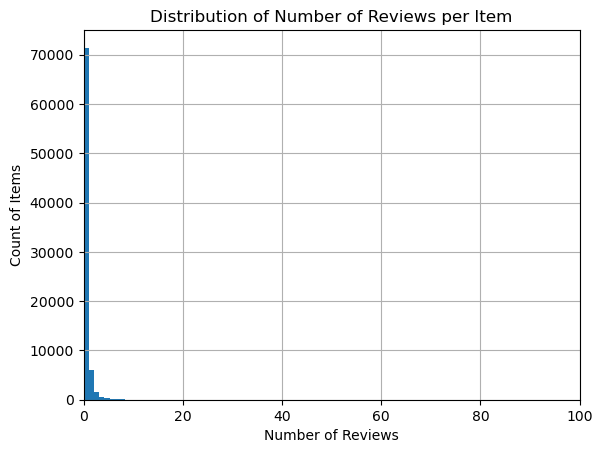

In [33]:
popular_items['num_reviews'].hist(bins=1000)
plt.title("Distribution of Number of Reviews per Item")
plt.xlim(0, 100)
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Items")
plt.show()

In [35]:
# user_id별 asin 개수를 집계하고 num_reviews 컬럼으로 이름 설정
user_activity_df = (
    review_df.groupby("user_id")["asin"]
    .count()
    .reset_index(name="num_reviews")
    .sort_values(by="num_reviews", ascending=False)
)

# 상위 20개 결과 출력
print("상위 20명의 사용자 활동:")
print(user_activity_df.head(20))


상위 20명의 사용자 활동:
                            user_id  num_reviews
11432  AFZUK3MTBIBEDQOPAK3OATUOUKLA         1531
8474   AFJBKPK5W56XWSNPQU2WW66ISWYQ         1074
22279  AHV6QCNBJNSGLATP56JAWJ3C4G2A          949
10983  AFXF3EGQTQDXMRLDWFU7UBFQZB7Q          878
12404  AG73BVBKUOH22USSFJA5ZWL7AKXA          675
8710   AFKMX6JZ655VPVYHBTATZQS4IBOQ          638
21270  AHPOHKN4PU4W3V5PGFL7AGTAD2AA          600
9817   AFQQQ5LGNSQUEBGDCYBAZZE5T3DA          471
17345  AGZZXSMMS4WRHHJRBUJZI4FZDHKQ          454
8946   AFLX66DKF6R3H6OEOC3TIVAYXZIQ          400
7873   AFFZVSTUS3U2ZD22A2NPZSKOCPGQ          377
18601  AHATA6X6MYTC3VNBFJ3WIYVK257A          362
20170  AHJQPUQLSQZE6LMIUMY7WNRXCQQQ          326
16092  AGSXMEKFKM2HDFZ4UNE676O6D5LQ          315
21226  AHPFHP43AXWRYZZ4HPNCW7I7J3ZQ          307
5415   AEYGPUCRKH7G4VM22FM3VAKSQ23Q          306
7423   AFDMZ4TRX3HXQQUGWAHJQTIF65BQ          281
5758   AF2BLE54TEMGZ546U763ZHZRXC4A          278
2490   AEICZD35OTDYVWA2KPYWN4PDZ2SA          267
1176

In [36]:
# rating별 개수를 집계하고 정렬
rating_counts = (
    review_df.groupby("rating")
    .size()  # 각 그룹의 개수를 계산
    .reset_index(name="count")  # 결과를 데이터프레임으로 변환
    .sort_values(by="rating")  # rating 기준으로 정렬
)

# 결과 출력
print("rating별 리뷰 개수:")
print(rating_counts)

rating별 리뷰 개수:
   rating  count
0     1.0   7441
1     2.0   4559
2     3.0   8016
3     4.0  15626
4     5.0  64274


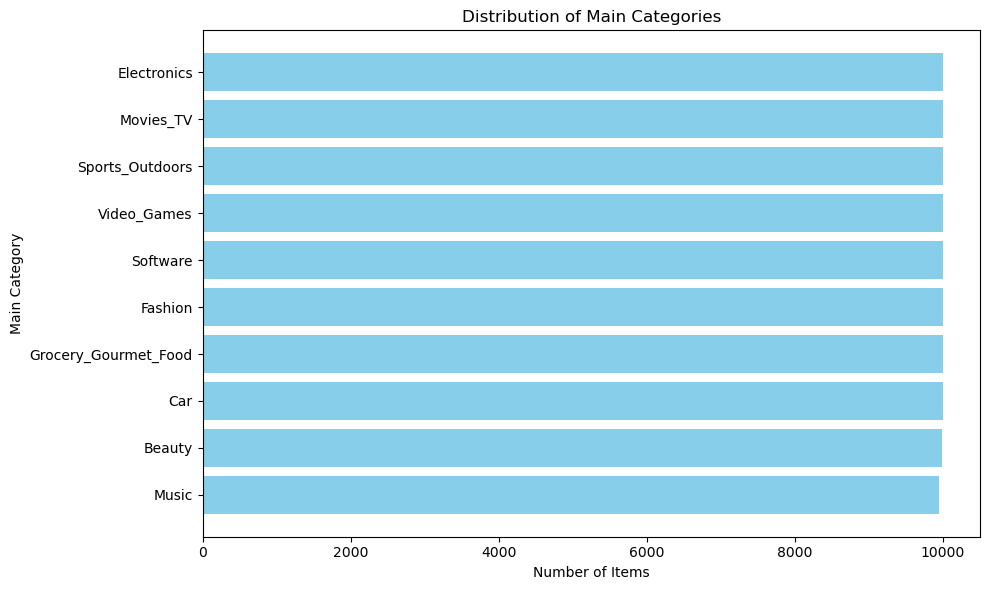

In [38]:
def visualize_category_distribution(result_df):
    """
    result_df에서 고유한 category의 분포를 시각화.
    """
    # 카테고리별 개수 집계 및 정렬
    category_counts = (
        result_df.groupby("category")
        .size()
        .reset_index(name="count")
        .sort_values(by="count", ascending=False)
    )

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(category_counts["category"], category_counts["count"], color="skyblue")
    plt.xlabel("Number of Items")
    plt.ylabel("Main Category")
    plt.title("Distribution of Main Categories")
    plt.gca().invert_yaxis()  # 카테고리를 내림차순으로 정렬
    plt.tight_layout()
    plt.show()

# 함수 호출
visualize_category_distribution(review_df)